# Plotting Time Series Data using pandas

In [13]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
file = Path('../../datasets/Ch9/closing_price.csv')
closing_price = pd.read_csv(file, 
                            index_col='Date',
                            parse_dates=True)

plt.rcParams["figure.figsize"] = [9, 4]

<AxesSubplot:xlabel='Date'>

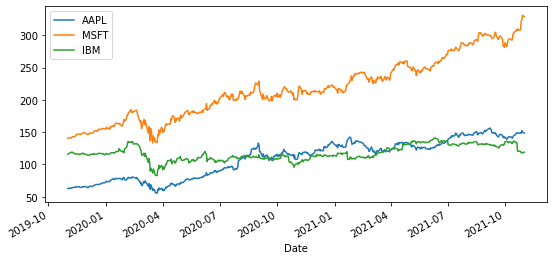

In [4]:
closing_price.plot()

<AxesSubplot:xlabel='Date'>

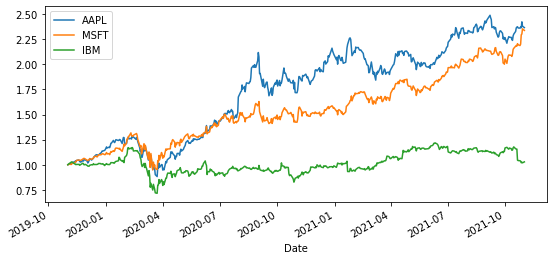

In [6]:
closing_price_n = closing_price.div(closing_price.iloc[0])
closing_price_n.plot()

In [7]:
closing_price_n.head()

,AAPL,MSFT,IBM
Date,,,
2019-11-01,1.000000,1.000000,1.000000
2019-11-04,1.006567,1.005775,1.015790
2019-11-05,1.005121,1.005149,1.017413
2019-11-06,1.005551,1.002366,1.023980
2019-11-07,1.017156,1.003757,1.027937


<AxesSubplot:xlabel='Date'>

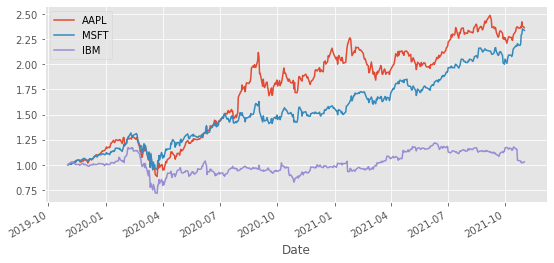

In [8]:
plt.style.use('ggplot')
closing_price_n.plot()

Using `.div()`

<AxesSubplot:xlabel='Date'>

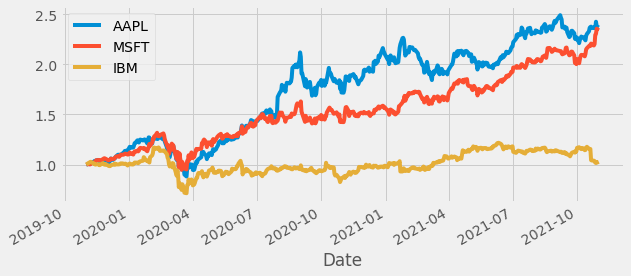

In [9]:
plt.style.use('fivethirtyeight')
closing_price_n.plot()

<AxesSubplot:xlabel='Date'>

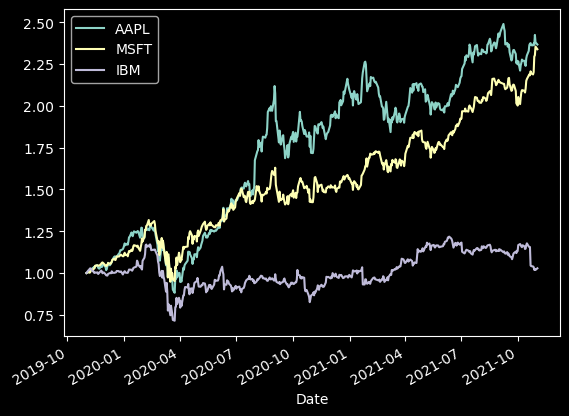

In [12]:
plt.style.use("dark_background")
closing_price_n.plot()

<AxesSubplot:xlabel='Date'>

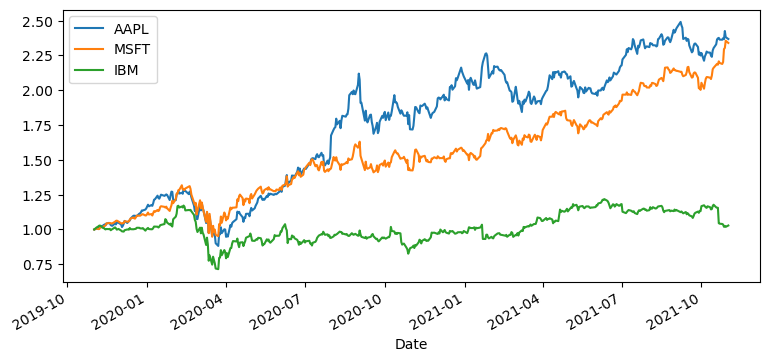

In [16]:
plt.style.use("default")
plt.rcParams["figure.figsize"] = [9, 4]
closing_price_n.plot()

In [17]:
closing_price_n.head()

,AAPL,MSFT,IBM
Date,,,
2019-11-01,1.000000,1.000000,1.000000
2019-11-04,1.006567,1.005775,1.015790
2019-11-05,1.005121,1.005149,1.017413
2019-11-06,1.005551,1.002366,1.023980
2019-11-07,1.017156,1.003757,1.027937


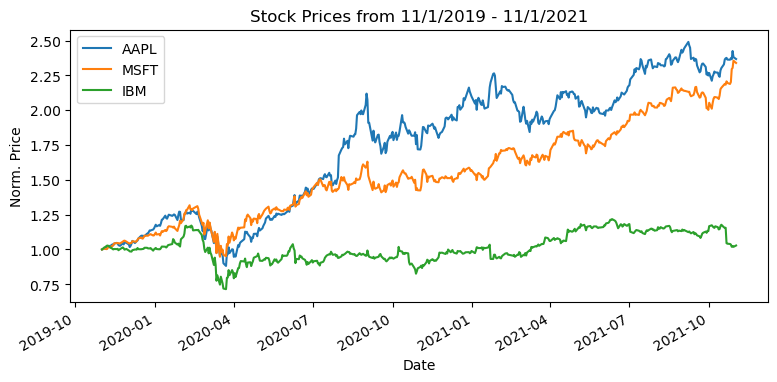

In [19]:
start_date = '11/1/2019'
end_date = '11/1/2021'
plot = closing_price_n.plot(
            title=f'Stock Prices from {start_date} - {end_date}',
            ylabel= 'Norm. Price')
plot.get_figure().savefig('plot_1.jpg')

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

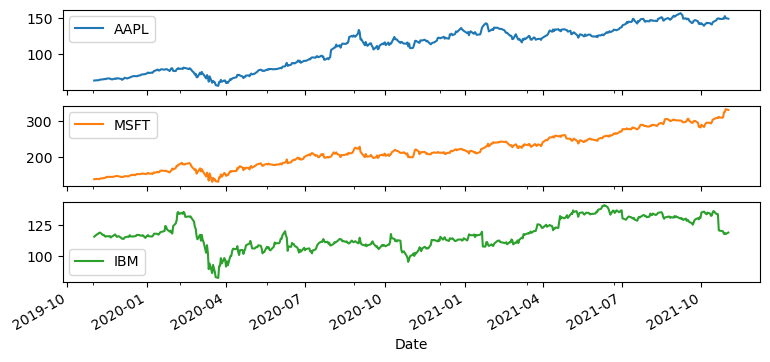

In [22]:
closing_price.plot(subplots=True)

# Plotting Time Series with Interactive Visualization using hvplot and Plotly Express

In [24]:
import pandas as pd
import hvplot.pandas 
import hvplot as hv
import plotly.express as px 

closing_price_n = closing_price.div(closing_price.iloc[0])

In [25]:
closing_price_n.head()

,AAPL,MSFT,IBM
Date,,,
2019-11-01,1.000000,1.000000,1.000000
2019-11-04,1.006567,1.005775,1.015790
2019-11-05,1.005121,1.005149,1.017413
2019-11-06,1.005551,1.002366,1.023980
2019-11-07,1.017156,1.003757,1.027937


In [26]:
closing_price_n.hvplot(
    title='Time Series plot using hvplot'
)

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [27]:
closing_price_n.plot(backend='hvplot', 
                     title='Time Series plot using hvplot')

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [29]:
closing_price.hvplot(width=300, subplots=True)

:NdLayout   [Variable]
   :Curve   [Date]   (value)

In [30]:
closing_price.hvplot(width=300, subplots=True).cols(2)

:NdLayout   [Variable]
   :Curve   [Date]   (value)

### There is more

In [32]:
closing_price.hvplot.violin(by="Symbols", color='Symbols')

:Violin   [Variable]   (value)

In [31]:
closing_price['AAPL'].hvplot.violin(by=['index.year','index.month'])

:Violin   [index.year,index.month]   (AAPL)

In [33]:
closing_price['AAPL'].hvplot.line(by=['index.year'])

:NdOverlay   [index.year]
   :Curve   [Date]   (AAPL)

In [34]:
aapl_2020 = closing_price[closing_price.index.year == 2020]['AAPL']
aapl_2020.hvplot(groupby=['index.year', 'index.month'], widget_type='scrubber', widget_location='bottom')


Column
    [0] HoloViews(DynamicMap, widget_location='bottom', widget_type='scrubber')
    [1] Row
        [0] HSpacer()
        [1] WidgetBox
            [0] Player(end=11, width=550)
        [2] HSpacer()

In [35]:
(closing_price['AAPL'].hvplot(width=400) + closing_price['MSFT'].hvplot(width=400)) * closing_price['IBM'].hvplot()

:Layout
   .Overlay.I  :Overlay
      .Curve.AAPL :Curve   [Date]   (AAPL)
      .Curve.IBM  :Curve   [Date]   (IBM)
   .Overlay.II :Overlay
      .Curve.MSFT :Curve   [Date]   (MSFT)
      .Curve.IBM  :Curve   [Date]   (IBM)

In [39]:
import pandas as pd
import seaborn as sns

In [45]:
melted_cp = closing_price_n.copy().reset_index().melt(id_vars=['Date'], value_vars=closing_price_n.columns.tolist())
melted_cp.head()

,Date,Symbols,value
0,2019-11-01,AAPL,1.000000
1,2019-11-04,AAPL,1.006567
2,2019-11-05,AAPL,1.005121
3,2019-11-06,AAPL,1.005551
4,2019-11-07,AAPL,1.017156


In [44]:
closing_price.columns.names = ['Symbols']

<AxesSubplot:xlabel='Date'>

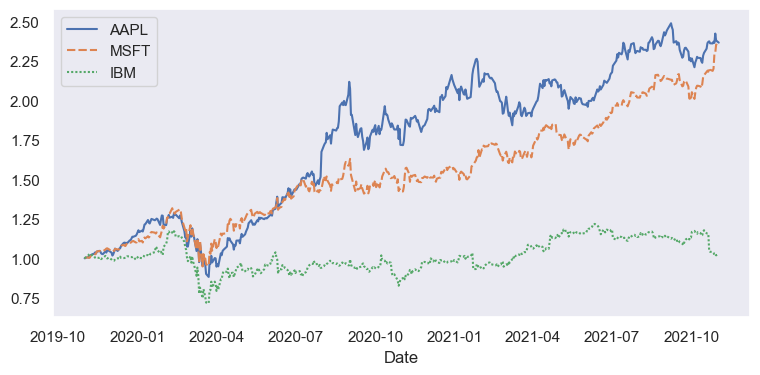

In [42]:
fig, ax = plt.subplots()
sns.lineplot(data=closing_price_n)

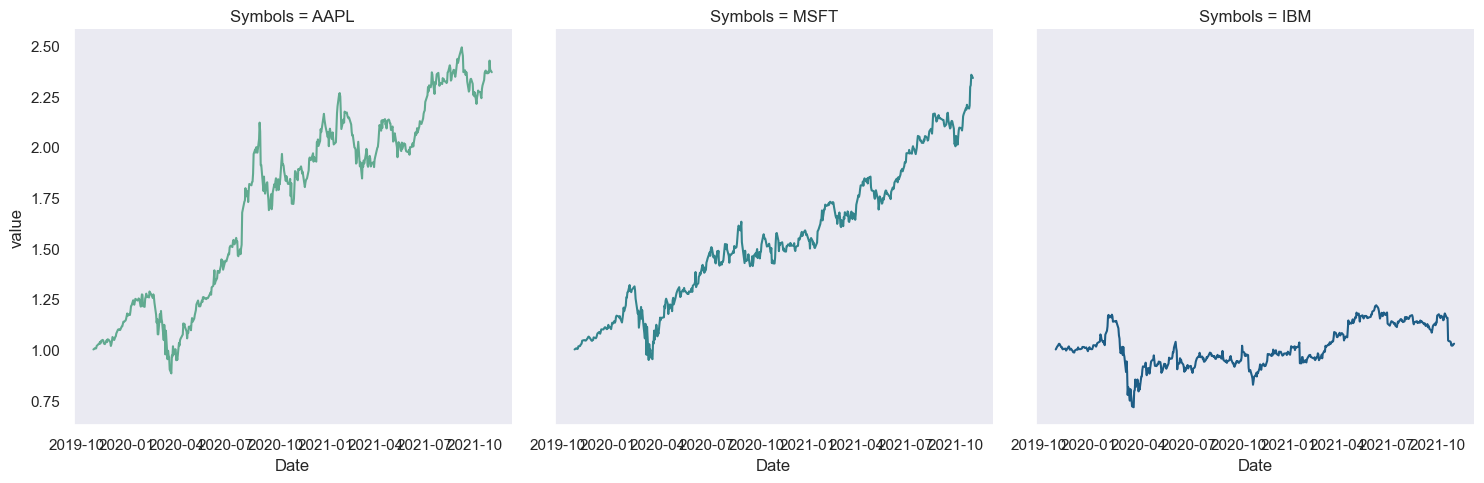

In [46]:
sns.set_theme(style="dark")

# Plot each year's time series in its own facet
g = sns.relplot(
    data=melted_cp,
    x="Date", y="value", col="Symbols", hue="Symbols",
    kind="line", palette="crest", legend=False, #col_wrap=1,
)

# Decomposing Time Series

In [242]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.datasets import elec_equip, co2
from statsmodels.tsa.seasonal import seasonal_decompose, STL
import matplotlib.pyplot as plt

In [243]:
plt.rcParams["figure.figsize"] = (14,3)

In [244]:
# co2 data
co2_df = co2.load_pandas().data
co2_df.head()

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4


In [245]:
# elec_equip data
elect_df = elec_equip.load_pandas().data
elect_df.head()

,STS.M.I7.W.TOVT.NS0016.4.000
DATE,
1995-01-01,66.19
1995-02-01,65.15
1995-03-01,74.48
1995-04-01,71.26
1995-05-01,67.63


In [246]:
# air passenger data
air_passengers = sm.datasets.get_rdataset("AirPassengers")
airp_df = air_passengers.data
airp_df.index = pd.date_range('1949', '1961', freq='M')
airp_df.drop(columns=['time'], inplace=True)
airp_df.head()

,value
1949-01-31,112
1949-02-28,118
1949-03-31,132
1949-04-30,129
1949-05-31,121


In [247]:
# write as a CSV dataset for future use
airp_df.reset_index().rename(columns={'value':'passengers', 'index':'date'}).to_csv('../../datasets/Ch8/air_passenger.csv', index=False)

### Plot the datasets

<AxesSubplot:xlabel='DATE'>

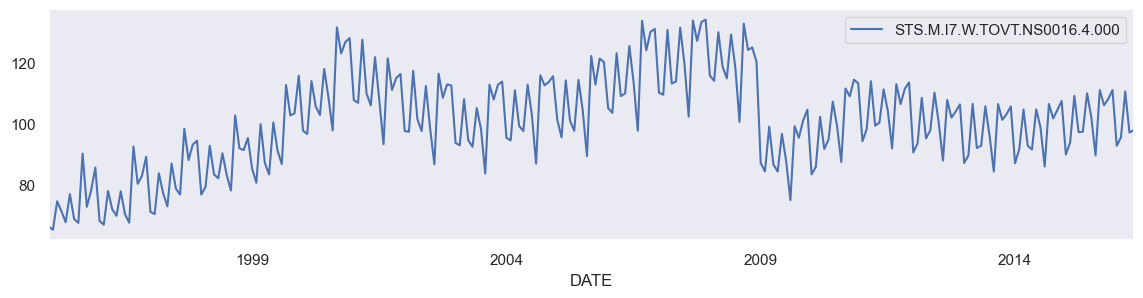

In [248]:
elect_df.plot()

<AxesSubplot:>

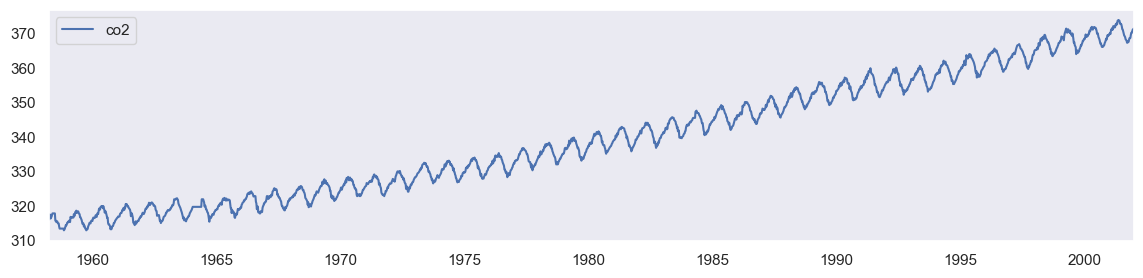

In [249]:
co2_df = co2_df.ffill()
co2_df.plot()

<AxesSubplot:>

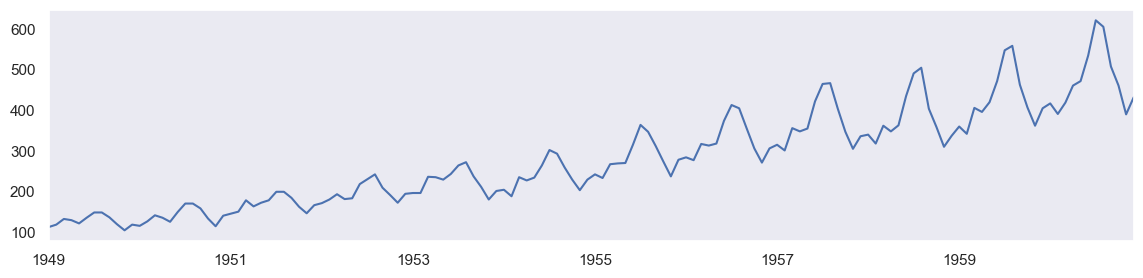

In [250]:
airp_df['value'].plot()

In [251]:
plt.rcParams["figure.figsize"] = (11,6)
# co2_decomposed = seasonal_decompose(co2_df)
elect_decomposed = seasonal_decompose(elect_df, model='addiditive')
air_decomposed = seasonal_decompose(airp_df, model='multiplicative')

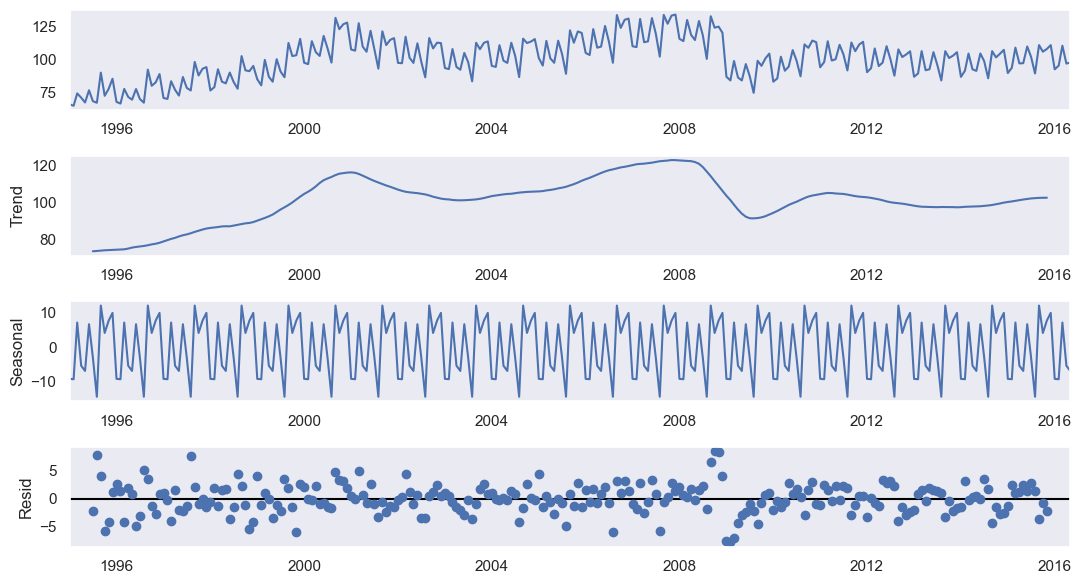

In [252]:
_ = elect_decomposed.plot()

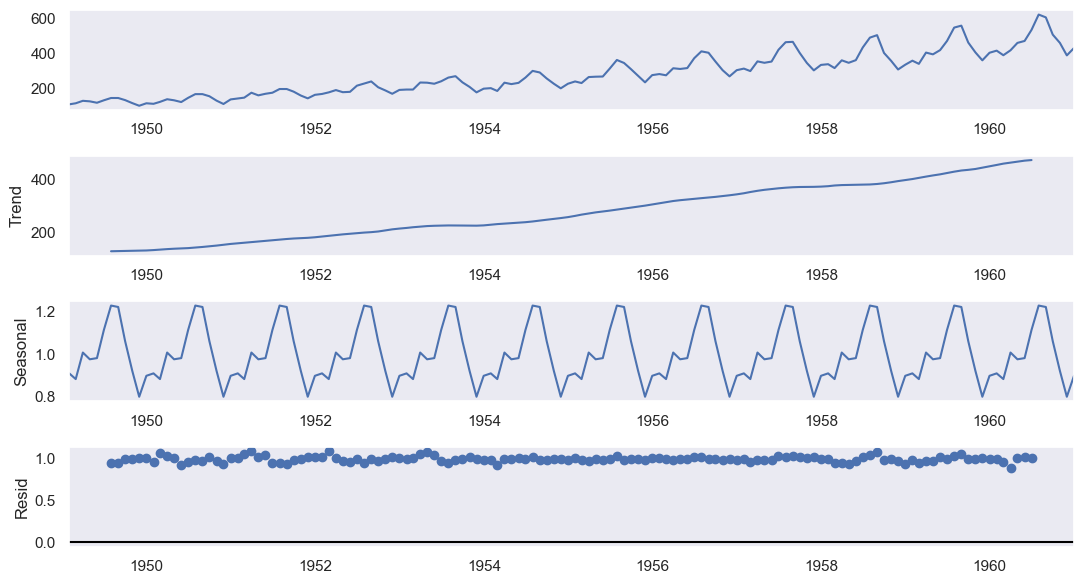

In [253]:
_ = air_decomposed.plot()

In [254]:
print(
    air_decomposed.observed[100],
    air_decomposed.seasonal[100],
    air_decomposed.trend[100],
    air_decomposed.resid[100])

355.0 0.9813780274951296 364.5 0.9924176745109154


In [255]:
air_decomposed.observed[100] == (
        air_decomposed.seasonal[100] * 
        air_decomposed.trend[100] * 
        air_decomposed.resid[100]
)

True

In [256]:
elect_decomposed = STL(
    elect_df, 
    seasonal=13, 
    robust=True).fit()

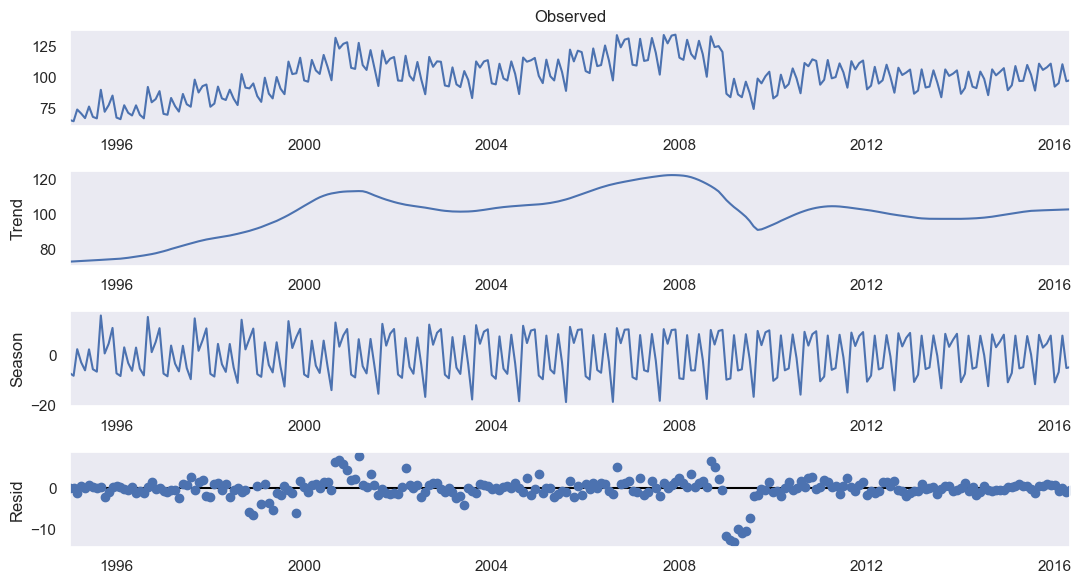

In [257]:
_ = elect_decomposed.plot()

In [258]:
elect_decomposed.observed.iloc[50, 0]

99.85

In [259]:
(elect_decomposed.seasonal + 
 elect_decomposed.trend + 
 elect_decomposed.resid)[50]

99.85

### There is more

In [260]:
plt.rcParams["figure.figsize"] = (10,3)
from statsmodels.tsa.filters.hp_filter import hpfilter

In [261]:
co2_cyclic, co2_trend = hpfilter(co2_df)

<AxesSubplot:>

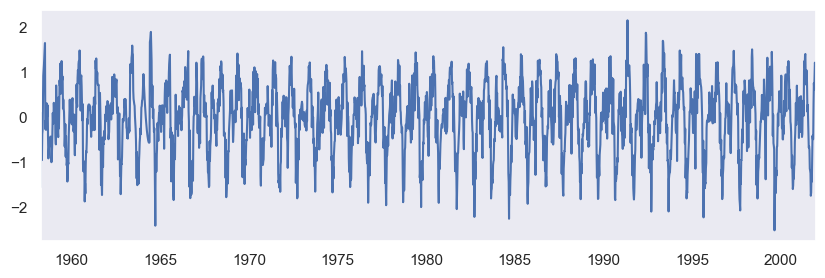

In [262]:
co2_cyclic.plot()

<AxesSubplot:>

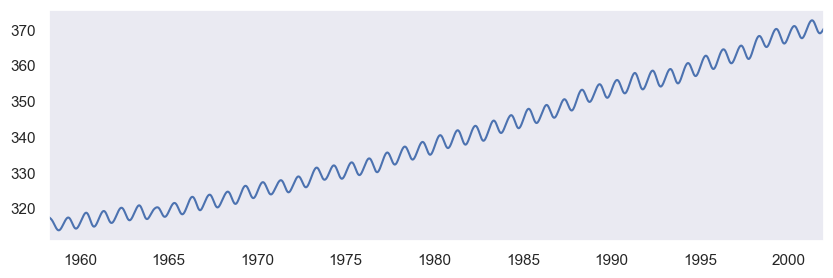

In [263]:
co2_trend.plot()

In [264]:
co2_df.iloc[25] == (co2_cyclic + co2_trend)[25]

co2    True
Name: 1958-09-20 00:00:00, dtype: bool

# Detecting Time Series Stationarity 

In [265]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.filters.hp_filter import hpfilter
from statsmodels.datasets import co2

plt.rcParams["figure.figsize"] = (15,4)

<AxesSubplot:>

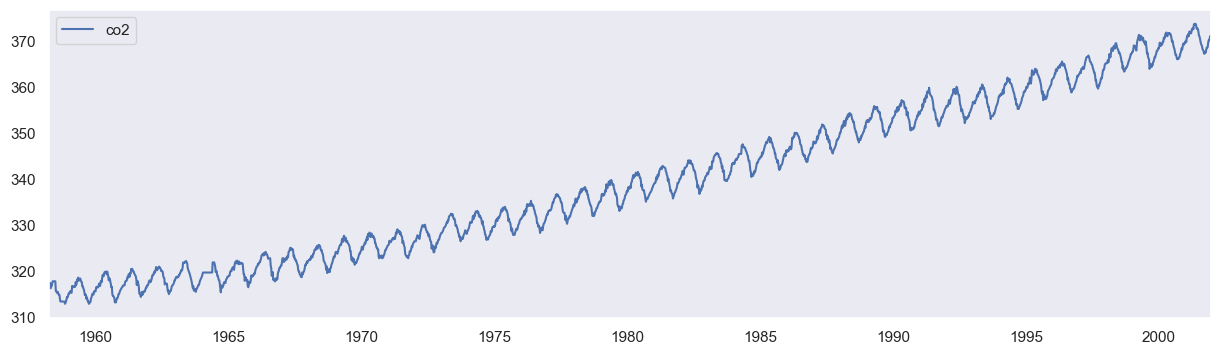

In [266]:
co2_df = co2.load_pandas().data.ffill()
co2_df.plot()

<AxesSubplot:ylabel='Frequency'>

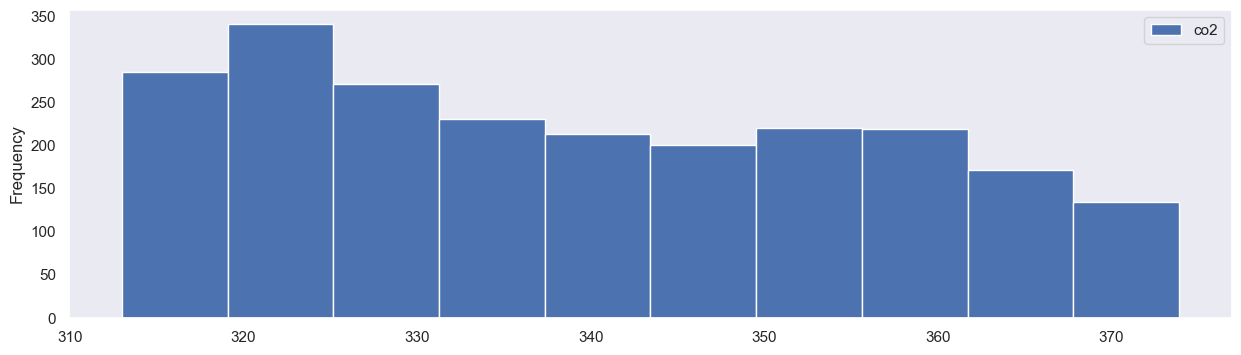

In [267]:
co2_df.plot(kind='hist')

In [268]:
co2_df.shape

(2284, 1)

In [269]:
output = adfuller(co2_df)
output

(0.046051108438122074,
 0.962178784678435,
 27,
 2256,
 {'1%': -3.4332519309441296,
  '5%': -2.8628219967376647,
  '10%': -2.567452466810334},
 2678.724132545794)

In [ ]:
# use this instead 
def results(output, name):
    output_dict = {
'Name': name,
'ADF Test Statistic': output[0],
'p-value': output[1],
'Lags used': output[2],
'Number of observations used': output[3],
'Maximized  info criteria': output[5]
    }
    for key, value in output[4].items():
        output_dict["Critical Value (%s)" % key] = value

    return output_dict

In [270]:
def results(output, name):
    output_dict = {
'Name': name,
'ADF Test Statistic': output[0],
'Critical Value 1%' : output[4]['1%'],
'Critical Value 5%' : output[4]['5%'],
'Critical Value 10%' : output[4]['10%'],
'p-value': output[1],
'Lags used': output[2],
'Number of observations used': output[3],
'Maximized  info criteria': output[5]
    }

    return output_dict

results(output, 'CO2 Original')

{'Name': 'CO2 Original',
 'ADF Test Statistic': 0.046051108438122074,
 'Critical Value 1%': -3.4332519309441296,
 'Critical Value 5%': -2.8628219967376647,
 'Critical Value 10%': -2.567452466810334,
 'p-value': 0.962178784678435,
 'Lags used': 27,
 'Number of observations used': 2256,
 'Maximized  info criteria': 2678.724132545794}

In [271]:
# using seasonal_decompose to remove trend
co2_decomposed = seasonal_decompose(co2_df['co2'])
co2_df['sd_detrend'] = (co2_decomposed.observed - 
               co2_decomposed.trend).dropna()
# using hp_filter
co2_cycle, co2_trend = hpfilter(co2_df['co2'])
co2_df['hp_detrend'] = co2_df['co2'] - co2_trend

# using first order differencing 
co2_df['diff_1_order'] = co2_df['co2'].diff()

# using second order differencing
co2_df['diff_2_order'] = co2_df['diff_1_order'].diff()


In [272]:
sd = adfuller(co2_df['sd_detrend'].dropna())
hp = adfuller(co2_df['hp_detrend'].dropna())
diff1 = adfuller(co2_df['diff_1_order'].dropna())
diff2 = adfuller(co2_df['diff_2_order'].dropna())
co2 = adfuller(co2_df['co2'])

In [273]:
output = []
for adf, name in zip([co2, sd, hp, diff1, diff2],
                     co2_df.columns):
    
    output.append(results(adf, name))
    

In [274]:
pd.DataFrame(output)

,Name,ADF Test Statistic,Critical Value 1%,Critical Value 5%,Critical Value 10%,p-value,Lags used,Number of observations used,Maximized info criteria
0,co2,0.046051,-3.433252,-2.862822,-2.567452,9.621788e-01,27,2256,2678.724133
1,sd_detrend,-23.037821,-3.433320,-2.862852,-2.567469,0.000000e+00,27,2204,2152.127432
2,hp_detrend,-15.847273,-3.433252,-2.862822,-2.567452,9.539170e-29,27,2256,2075.303225
3,diff_1_order,-15.517472,-3.433253,-2.862823,-2.567453,2.306361e-28,27,2255,2658.191447
4,diff_2_order,-15.400582,-3.433248,-2.862820,-2.567452,3.219219e-28,22,2259,2880.008641


<AxesSubplot:>

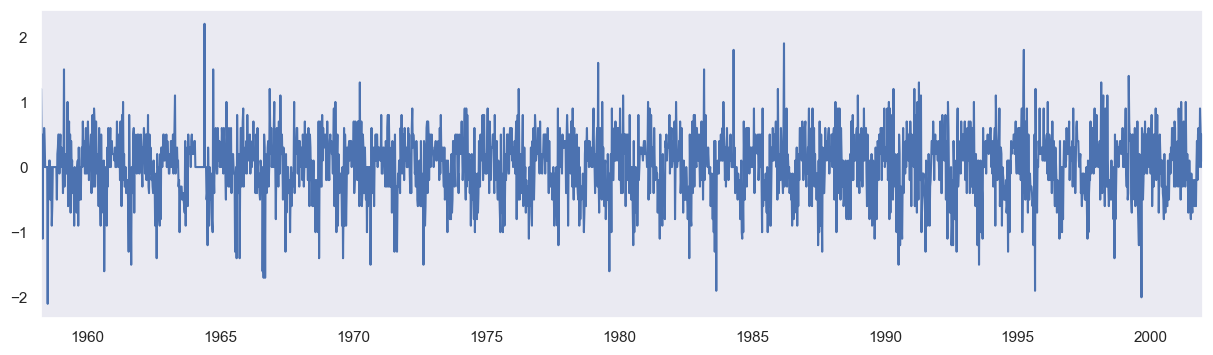

In [275]:
co2_df['diff_1_order'].plot()

In [276]:
pd.concat([co2_df['co2'].describe(), 
           co2_df['diff_1_order'].describe()], 
           axis=1)

,co2,diff_1_order
count,2284.000000,2283.000000
mean,339.647242,0.024266
std,17.106905,0.495959
min,313.000000,-2.100000
25%,323.975000,-0.300000
50%,337.700000,0.100000
75%,354.500000,0.400000
max,373.900000,2.200000


<AxesSubplot:title={'center':'CO2 Non-Stationary'}, ylabel='Frequency'>

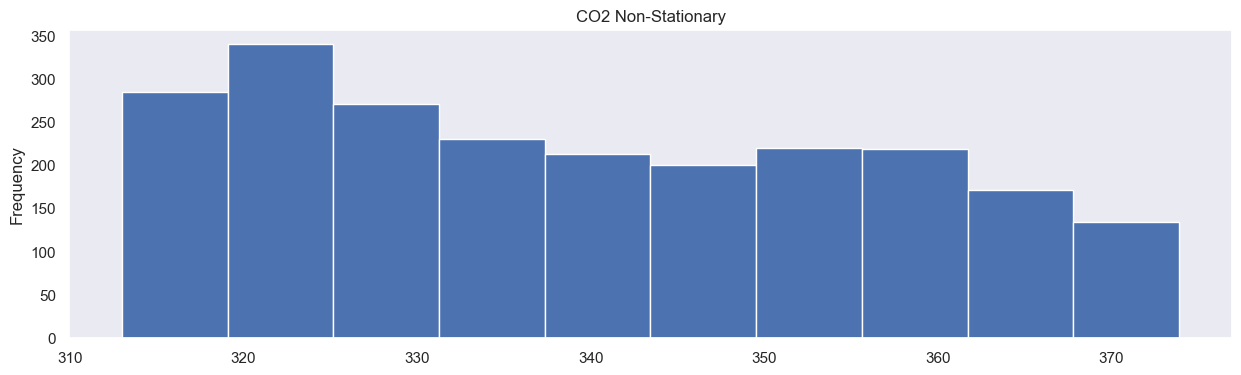

In [277]:
co2_df['co2'].plot(kind='hist', title='CO2 Non-Stationary')

<AxesSubplot:title={'center':'CO2 Stationary'}, ylabel='Frequency'>

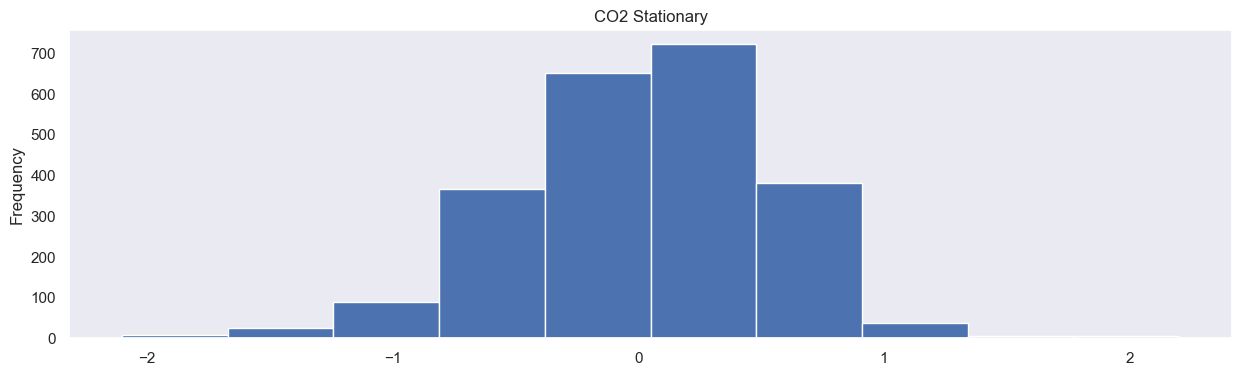

In [278]:
co2_df['diff_1_order'].plot(kind='hist', title='CO2 Stationary')

### There is more

In [280]:
from statsmodels.tsa.stattools import kpss

In [284]:
co2_df

,co2,sd_detrend,hp_detrend,diff_1_order,diff_2_order
1958-03-29,316.1,NaN,-1.559479,NaN,NaN
1958-04-05,317.3,NaN,-0.285928,1.2,NaN
1958-04-12,317.6,NaN,0.088597,0.3,-0.9
1958-04-19,317.5,NaN,0.065250,-0.1,-0.4
1958-04-26,316.4,NaN,-0.954871,-1.1,-1.0
...,...,...,...,...,...
2001-12-01,370.3,NaN,0.619135,0.0,-0.6
2001-12-08,370.8,NaN,0.969594,0.5,0.5
2001-12-15,371.2,NaN,1.215590,0.4,-0.1
2001-12-22,371.3,NaN,1.159358,0.1,-0.3


In [287]:
kpss(co2_df['co2'], regression="c", nlags="auto")

/Users/tarekatwan/opt/anaconda3/envs/ch2/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:1906: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




(7.649196300169511,
 0.01,
 29,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

# Applying Power Transformations to Time Series Data

In [288]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import shapiro, boxcox
from statsmodels.stats.diagnostic import het_breuschpagan, het_white
import statsmodels.api as sm
from statsmodels.formula.api import ols
from pathlib import Path

In [289]:
file = Path('../../datasets/Ch8/air_passenger.csv')
airp = pd.read_csv(file, 
                   index_col='date', 
                   parse_dates=['date'])
airp.head()

,passengers
date,
1949-01-31,112
1949-02-28,118
1949-03-31,132
1949-04-30,129
1949-05-31,121


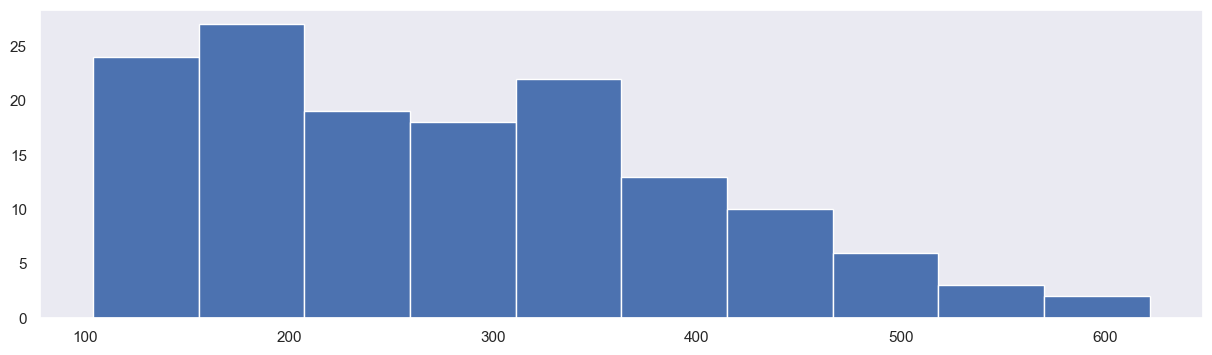

In [290]:
plt.hist(airp)
plt.show()

In [291]:
test_stat, p_val = shapiro(airp)
print(p_val)

6.832739018136635e-05


In [292]:
df = airp.reset_index()
model = ols(formula='passengers~date', data=df).fit()

In [293]:
het_white(model.resid, model.model.exog)

(144.0, 0.46080531721652596, nan, nan)

In [294]:
xt, lmda = boxcox(airp.values.ravel())

In [295]:
test_stat, p_val = shapiro(xt)
print(p_val)

0.009484317153692245


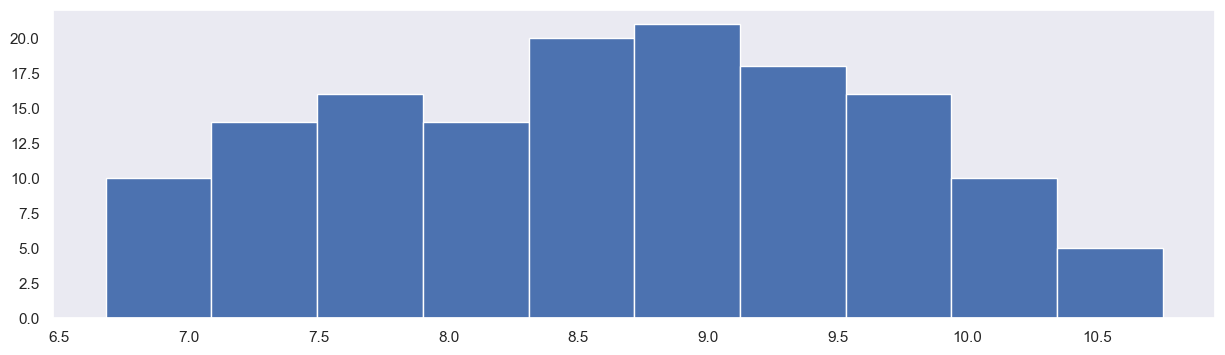

In [296]:
plt.hist(xt)
plt.show()

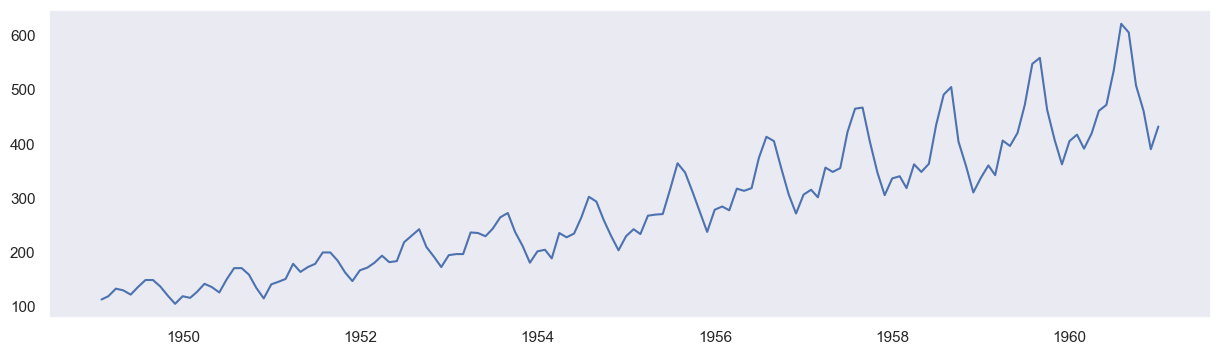

In [297]:
plt.plot(airp)

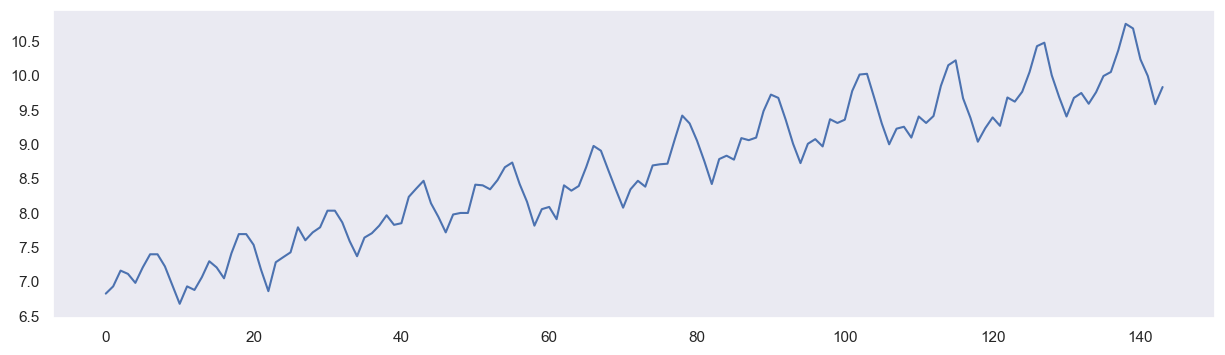

In [298]:
plt.plot(xt)


# Testing for Autocorrelation

In [299]:
import pandas as pd
import numpy as np
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.datasets import co2

co2_df = co2.load_pandas().data.ffill()

In [300]:
co2_diff = co2_df.diff().dropna()

In [301]:
acorr_ljungbox(co2_diff, lags=10, return_df=True)

,lb_stat,lb_pvalue
1,16.465996,4.953050e-05
2,79.094659,6.680563e-18
3,290.951900,9.035108e-63
4,390.520507,3.107289e-83
5,502.638658,2.151267e-106
6,546.194148,9.337537e-115
7,608.250032,4.072029e-127
8,630.709764,5.827742e-131
9,637.510409,1.851867e-131
10,641.806647,1.923859e-131


In [302]:
acorr_ljungbox(co2_diff, auto_lag=True, return_df=True)

,lb_stat,lb_pvalue
1,16.465996,4.953050e-05
2,79.094659,6.680563e-18
3,290.951900,9.035108e-63
4,390.520507,3.107289e-83
5,502.638658,2.151267e-106
...,...,...
2210,74510.868394,0.000000e+00
2211,74513.567714,0.000000e+00
2212,74515.294613,0.000000e+00
2213,74520.306956,0.000000e+00


# Plotting ACF and PACF

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pathlib import Path
plt.rcParams["figure.figsize"] = (15,4)

In [186]:
file = Path('../../datasets/Ch8/air_passenger.csv')
airp = pd.read_csv(file, 
                   index_col='date', 
                   parse_dates=['date'])

In [173]:
airp_diff = airp.diff().dropna()

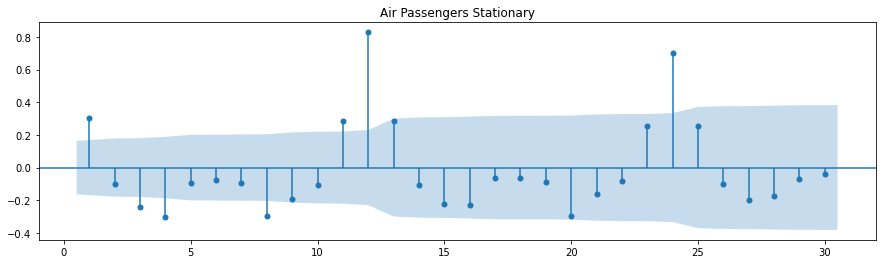

In [182]:
_ = plot_acf(airp_diff, lags=30, title='Air Passengers Stationary', zero=False)

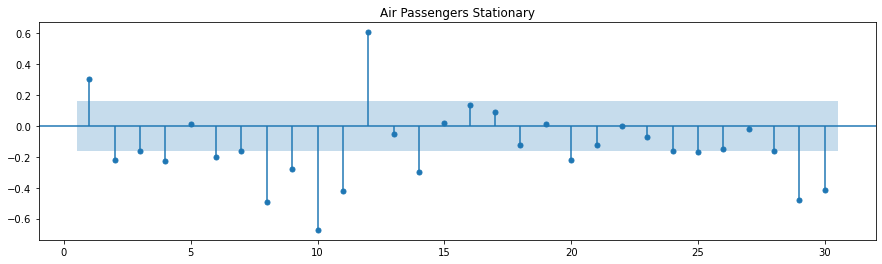

In [183]:
_ = plot_pacf(airp_diff, lags=30, title='Air Passengers Stationary', zero=False)

In [162]:
from pandas.plotting import autocorrelation_plot

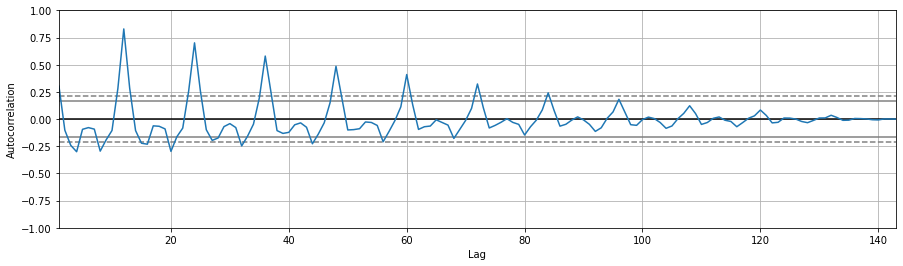

In [185]:
_ = autocorrelation_plot(airp_diff)